In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [6]:
data = pd.read_csv('data/StudentsPerformance.csv')

In [7]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
x = data.drop(columns='math score', axis=1)
y = data['math score']

In [13]:
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

In [14]:
print(num_features)
print(cat_features)

Index(['reading score', 'writing score'], dtype='object')
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [15]:
numerice_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

In [16]:
preprocessor = ColumnTransformer([
    ('OneHotEncoder',oh_transformer,cat_features),
    ('StandardScaler',numerice_transformer,num_features)
])

In [17]:
x = preprocessor.fit_transform(x)

In [18]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [19]:
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

Evaluate Model

In [21]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [37]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training Set')
    print("- Root Mean Square Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Square Error: {:.4f}".format(model_train_r2))

    print("-------------------------------------")

    print('Model Performance for Test Set')
    print("- Root Mean Square Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Square Error: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")

Linear Regression
Model Performance for Training Set
- Root Mean Square Error: 5.3253
- Mean Absolute Error: 4.2698
- R2 Square Error: 0.8742
-------------------------------------
Model Performance for Test Set
- Root Mean Square Error: 5.4242
- Mean Absolute Error: 4.2236
- R2 Square Error: 0.8791


Lasso
Model Performance for Training Set
- Root Mean Square Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Square Error: 0.8071
-------------------------------------
Model Performance for Test Set
- Root Mean Square Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Square Error: 0.8253


Ridge
Model Performance for Training Set
- Root Mean Square Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Square Error: 0.8743
-------------------------------------
Model Performance for Test Set
- Root Mean Square Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Square Error: 0.8806


K-Neighbors Regressor
Model Performance for Training Set
- Root Mean Square Error: 5.7091
- Mean Absolute Error: 4.517

In [38]:
print(model_list)
print(r2_list)

['Linear Regression', 'Lasso', 'Ridge', 'K-Neighbors Regressor', 'Decision Tree', 'Random Forest Regressor', 'AdaBoost Regressor']
[0.8790897593960201, 0.8253197323627852, 0.8805931485028738, 0.7834973847119895, 0.7339918401699033, 0.8507136523635627, 0.8468153275072436]


In [39]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.879090
5,Random Forest Regressor,0.850714
6,AdaBoost Regressor,0.846815
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783497
4,Decision Tree,0.733992


In [41]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy Score of the model is %.2f" %score)

Accuracy Score of the model is 87.91


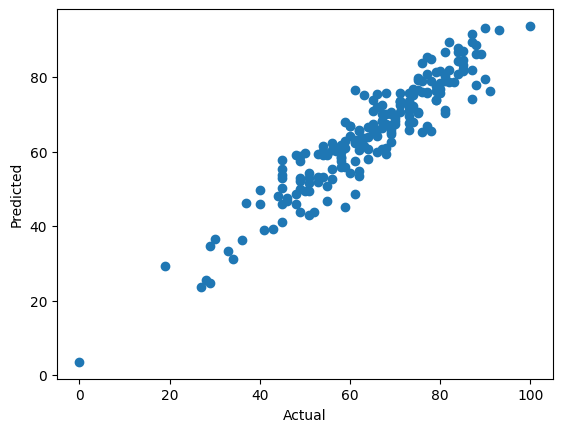

In [43]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [45]:
pred_data = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_data

,Actual Value,Predicted Value,Difference
521,91,76.21875,14.78125
737,53,59.21875,-6.21875
740,80,76.90625,3.09375
660,74,76.78125,-2.78125
411,84,87.87500,-3.87500
...,...,...,...
408,52,43.65625,8.34375
332,62,62.25000,-0.25000
208,74,67.81250,6.18750
613,65,66.84375,-1.84375
